#Microbenchmarking
###Julia vs. R

>In computing, a *benchmark* is the act of running a computer program, a set of programs, or other operations, in order to assess the relative performance of an object, normally by running a number of standard tests and trials against it.

# Agenda
 - Julia performance dos and don'ts
 - Rules of the game
 - Tests
 - Results
 - Comments
 
 

# Julia performance dos and don'ts
These are suggestions from [docs.julialang.org](http://docs.julialang.org/en/latest/manual/performance-tips/)

# Avoid global variables
 - Variables should be local, or passed as arguments to functions, whenever possible
 - Any code that is performance-critical or being benchmarked should be inside a function

# Measure performance with `@time`
 - `@time` reports time as well as memory allocation
 - This is the single biggest advantage of `@time` vs. functions like `tic` and `toc`

# Run everything twice
 - On the first call everything gets compiled 
 - You should not take the results of this run seriously

# Avoid containers with abstract type parameters
 - Since abstract objects can be of arbitrary size and structure, they must be represented as an array of pointers to individually allocated objects; this is slow
 - Defining a type will create a contiguous block of values that can be manipulated efficiently

# Break functions up
- Writing a function as many small definitions allows the compiler to directly call the most applicable code, or even inline it

# Rules of the game
 - Attempt to follow best practices for both languages
 - **Except**, no Hadley code in R
 - Run each task 100x
 - My computer: Lenovo desktop, Ubuntu 14.04 LTS, 3.6 GiB Memory

# Tests
 1. Recursive Fibonacci 
 2. Array construction
 1. Matrix multiplication and transpose
 1. Dot product of vectors
 1. Statistics on a random matrix

#1. Recursive fibonacci
###Julia

In [1]:
function fib(n) 
    n < 2 ? n : fib(n-1) + fib(n-2)
end


fib (generic function with 1 method)

###R

In [1]:
fib <- function(n) {
    if(n < 2) {
        return(n)
    } else {
        return(fib(n-1) + fib(n-2))
    }
}

#2. Array construction
###Julia

In [1]:
function array_construct(n)
    ones(n, n)
end

array_construct (generic function with 1 method)

###R

In [1]:
matrix(1, 200, 200)


#3. Matrix multiplication and transpose

###Julia

In [2]:
function mat_mult(n) 
    A = array_construct(n);
    A*A'
end

mat_mult (generic function with 1 method)

###R

In [ ]:
 A <- matrix(1, 200, 200)
 A%*%t(A)

#4. Dot product of vectors

###Julia

In [1]:
function inner(x, y)
    result = 0.0
    for i=1:length(x)
        result += x[i] * y[i]
    end
    result
end

inner (generic function with 1 method)

###R

In [ ]:
x <- rnorm(10000000)
y <- rnorm(10000000)
x %*% y

#5. Statistics on a random matrix

###Julia

In [2]:
function rand_mat_stat(t)
    n = 5
    v = zeros(t)
    w = zeros(t)
    for i=1:t
        a = randn(n,n)
        b = randn(n,n)
        c = randn(n,n)
        d = randn(n,n)
        P = [a b c d]
        Q = [a b; c d]
        v[i] = trace((P.'*P)^4)
        w[i] = trace((Q.'*Q)^4)
    end
    return (std(v)/mean(v), std(w)/mean(w))
end


rand_mat_stat (generic function with 1 method)

###R

In [ ]:
rand_mat_stat <- function(t) {
  n <- 5
  stuff <- sapply(1:t, function(i){
    mat_a <- matrix(rnorm(n*n), n, n)
    mat_b <- matrix(rnorm(n*n), n, n)
    mat_c <- matrix(rnorm(n*n), n, n)
    mat_d <- matrix(rnorm(n*n), n, n)
    P <-cbind(mat_a, mat_b, mat_c, mat_d)
    Q <- rbind(cbind(mat_a, mat_b),cbind(mat_c, mat_d))
    
    c(sum(diag((t(P)%*%P)^4)), sum(diag((t(Q)%*%Q)^4)))
  })
  
  res <- apply(stuff,1,function(x) sd(x)/mean(x))
  return(res)
}

# Results

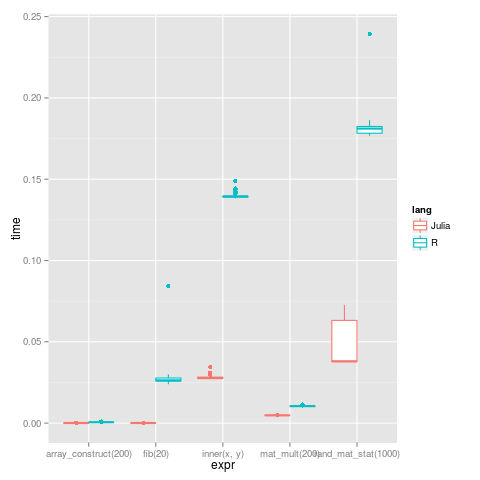

In [1]:
library(ggplot2)
times <- read.csv("written_data/combined_benchmark_times.csv")

qplot(expr, time, data=times, geom="boxplot", colour=lang)

#`inner(x, y)`

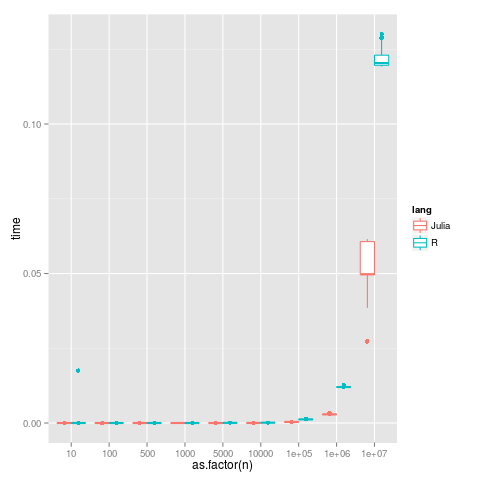

In [3]:
times_inner <- read.csv("written_data/combined_benchmark_inner.csv")

qplot(as.factor(n), time, data=times_inner, geom="boxplot", colour=lang)

# Comments

- In general, R is slower (we know this)
- The results of these tests are dependent on the skill of the programmer in the languages
- The type of benchmarking one chooses to run can make a language look better or worse than its competitors
    - Notice I didn't look at any actual data
    - **Nudge, nudge Eric**
- [Further reading](http://economics.sas.upenn.edu/~jesusfv/comparison_languages.pdf)